# Atividade 1 - Visualização de dados

- Aluno: Leonardo Henrique de Braz
- Matrícula: 217148
- Dataset escolhido: Notificações de Síndrome Gripal - 2021
- Link: https://opendatasus.saude.gov.br/dataset/notificacoes-de-sindrome-gripal-leve-2022

Detalhes do dataset:
- Estado: RO
- Lote: 1
- Baixar o CSV no site do OpenDataSUS

# Configuração do ambiente

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

## Importando o CSV com os dados

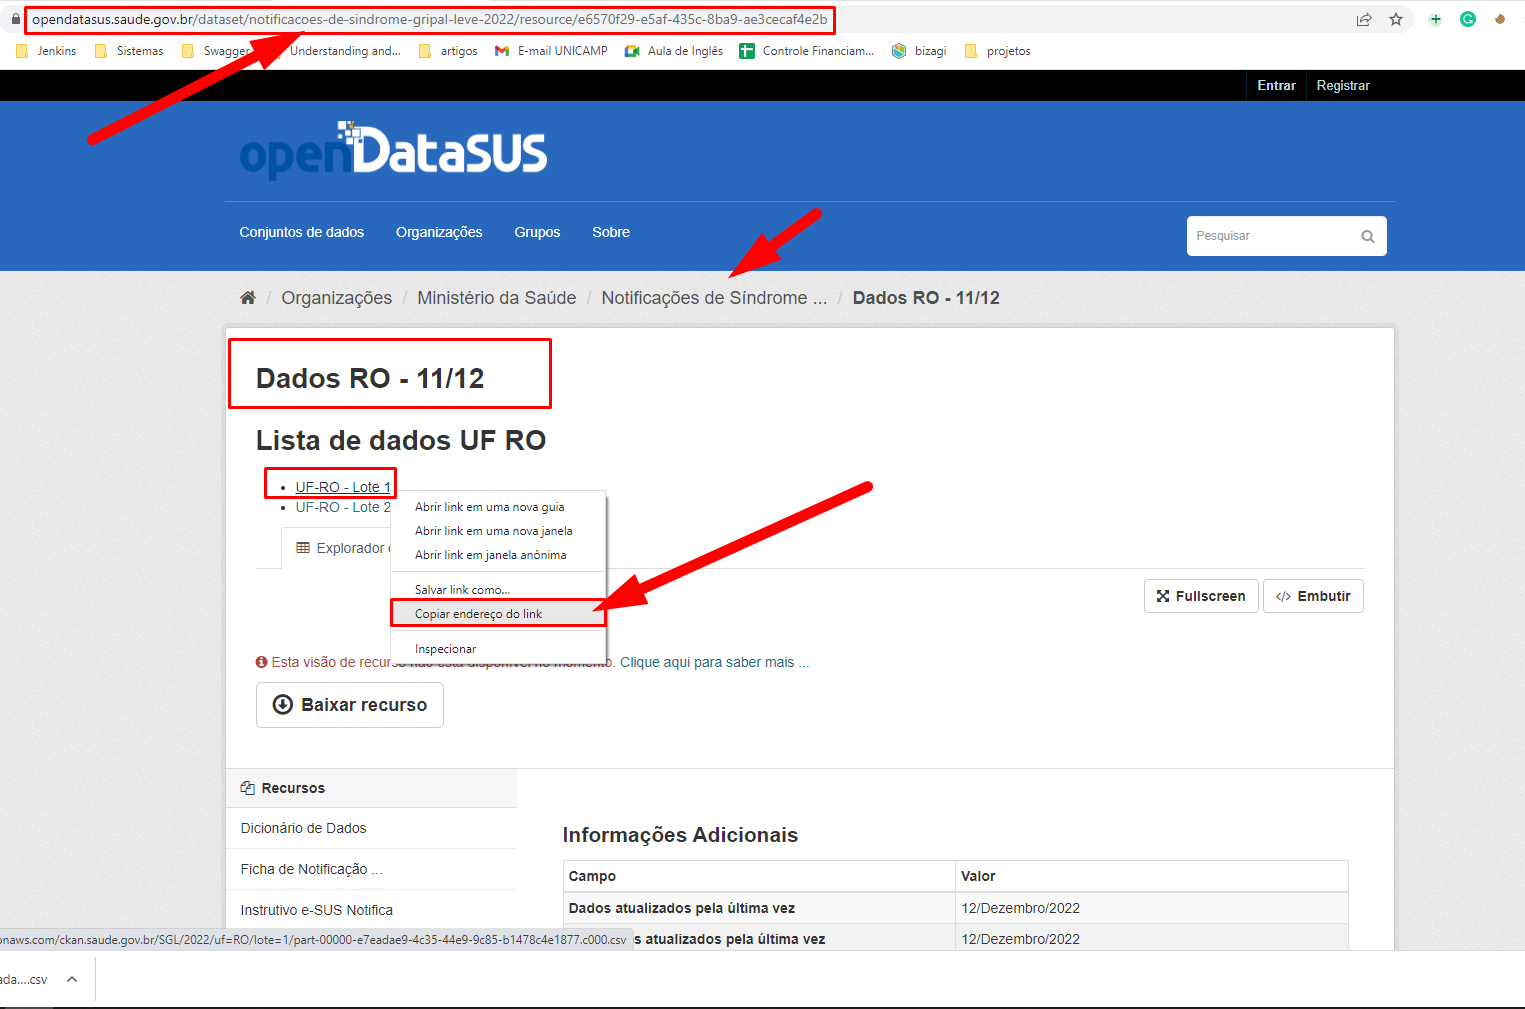

In [49]:
# O dataset é muito grande. 
# Todas as vezes que eu preciso, carrego o link do CDN do próprio gov.br
# Encontro ele na página do opendatasus, daí copio o link e colo na variável abaixo

# url_dataset = "https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SGL/2022/uf=RO/lote=1/part-00000-e7eadae9-4c35-44e9-9c85-b1478c4e1877.c000.csv"
url_dataset = "./dataset.c000.csv"

In [50]:
dados = pd.read_csv(url_dataset, delimiter=';', quoting=csv.QUOTE_ALL)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:
print("Tipo do dataset: {}".format(type(dados)))
print("Quantidade de linhas: {}".format(len(dados)))
print("Colunas: ")
print(dados.columns)

Tipo do dataset: <class 'pandas.core.frame.DataFrame'>
Quantidade de linhas: 420787
Colunas: 
Index(['sintomas', 'profissionalSaude', 'racaCor', 'outrosSintomas',
       'outrasCondicoes', 'profissionalSeguranca', 'cbo', 'condicoes', 'sexo',
       'estado', 'estadoIBGE', 'municipio', 'municipioIBGE', 'origem',
       'estadoNotificacao', 'municipioNotificacao', 'municipioNotificacaoIBGE',
       'evolucaoCaso', 'classificacaoFinal', 'codigoEstrategiaCovid',
       'codigoBuscaAtivaAssintomatico', 'outroBuscaAtivaAssintomatico',
       'codigoTriagemPopulacaoEspecifica', 'outroTriagemPopulacaoEspecifica',
       'codigoLocalRealizacaoTestagem', 'outroLocalRealizacaoTestagem',
       'codigoRecebeuVacina', 'codigoLaboratorioPrimeiraDose',
       'codigoLaboratorioSegundaDose', 'lotePrimeiraDose', 'loteSegundaDose',
       'codigoContemComunidadeTradicional', 'source_id', 'excluido',
       'validado', 'codigoDosesVacina', 'estadoNotificacaoIBGE',
       'totalTestesRealizados', 'dataNot

## Obtendo primeiras informações dos dados

### Filtrando os sintomas pelas ocorrências

In [52]:
ocorrencias_sintomas = {}

for sintomas in dados.sintomas:
  for texto in sintomas.split(','):
    sintoma = texto.strip()
    quantidade = ocorrencias_sintomas[sintoma] + 1 if sintoma in ocorrencias_sintomas else 1
    ocorrencias_sintomas[sintoma] = quantidade

In [53]:
ocorrencias_sintomas

{'Assintomático': 81351,
 'Dor de Cabeça': 199097,
 'Tosse': 207777,
 'Dor de Garganta': 151195,
 'Coriza': 145719,
 'Febre': 165695,
 'Dispneia': 31705,
 'Outros': 74317,
 'Distúrbios Gustativos': 14767,
 'Distúrbios Olfativos': 13353}

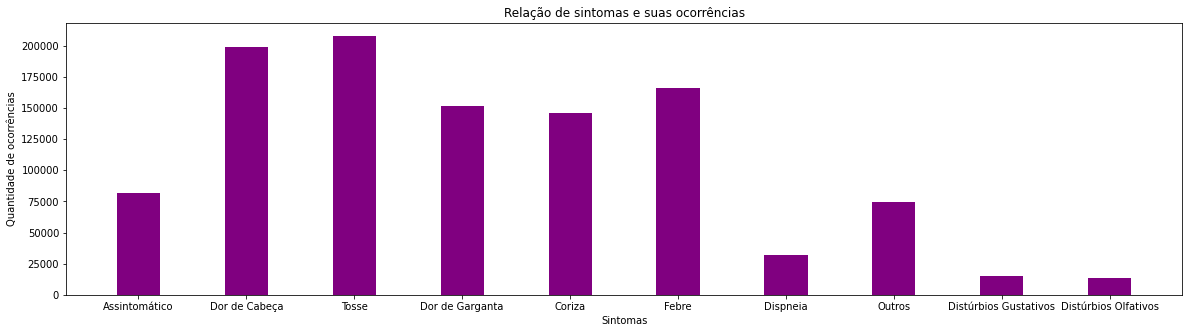

In [54]:
sintomas = ocorrencias_sintomas.keys()
ocorrencias = ocorrencias_sintomas.values()

fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(sintomas, ocorrencias, color = 'purple', width = 0.4)
 
plt.xlabel("Sintomas")
plt.ylabel("Quantidade de ocorrências")
plt.title("Relação de sintomas e suas ocorrências")
plt.show()

### Mostrando ocorrências baseadas em faixa etária

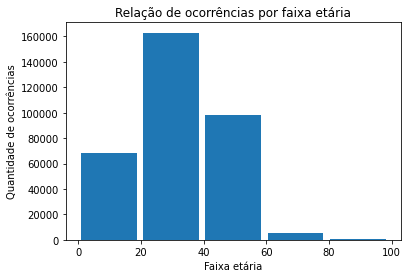

In [55]:
idades = [int(x) for x in dados.idade if str(x) != 'nan' and x <= 100]

plt.hist(idades, 5, rwidth=0.9)
plt.xlabel("Faixa etária")
plt.ylabel("Quantidade de ocorrências")
plt.title("Relação de ocorrências por faixa etária")
plt.show()

### Quantidade de ocorrências por município


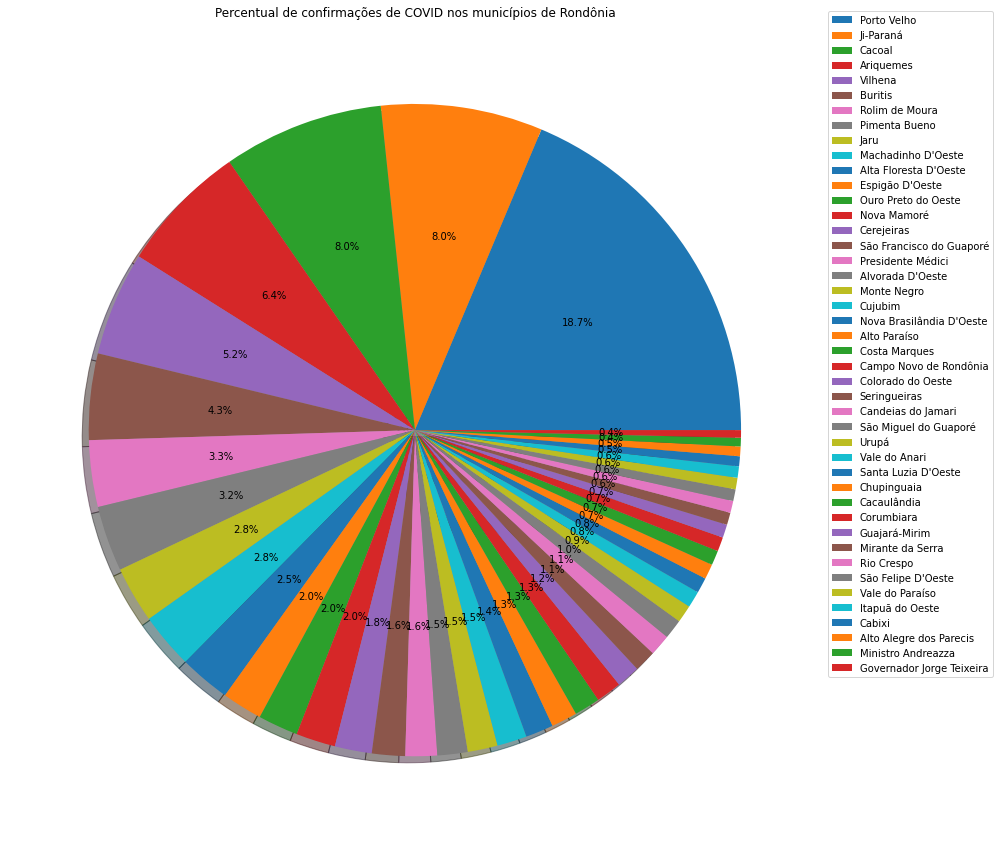

In [56]:
set(dados.classificacaoFinal)

confirmados = dados[dados.classificacaoFinal.isin([
    'Confirmado Clínico-Epidemiológico',
    'Confirmado Clínico-Imagem',
    'Confirmado Laboratorial',
    'Confirmado por Critério Clínico'])]

confirmados_por_municipio = confirmados.municipio.value_counts()
confirmados_por_municipio = confirmados_por_municipio[confirmados_por_municipio.values > 500]

image = confirmados_por_municipio.plot(kind='pie', autopct='%1.1f%%', title='Percentual de confirmações de COVID nos municípios de Rondônia', figsize=(15, 15), shadow=True, legend=True, ylabel='', labeldistance=None)
image.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.show()

### Visualização da dispersão dos casos confirmados a partir da idade

([<matplotlib.axis.XTick at 0x7f47b6705370>,
 <a list of 21 Text major ticklabel objects>)

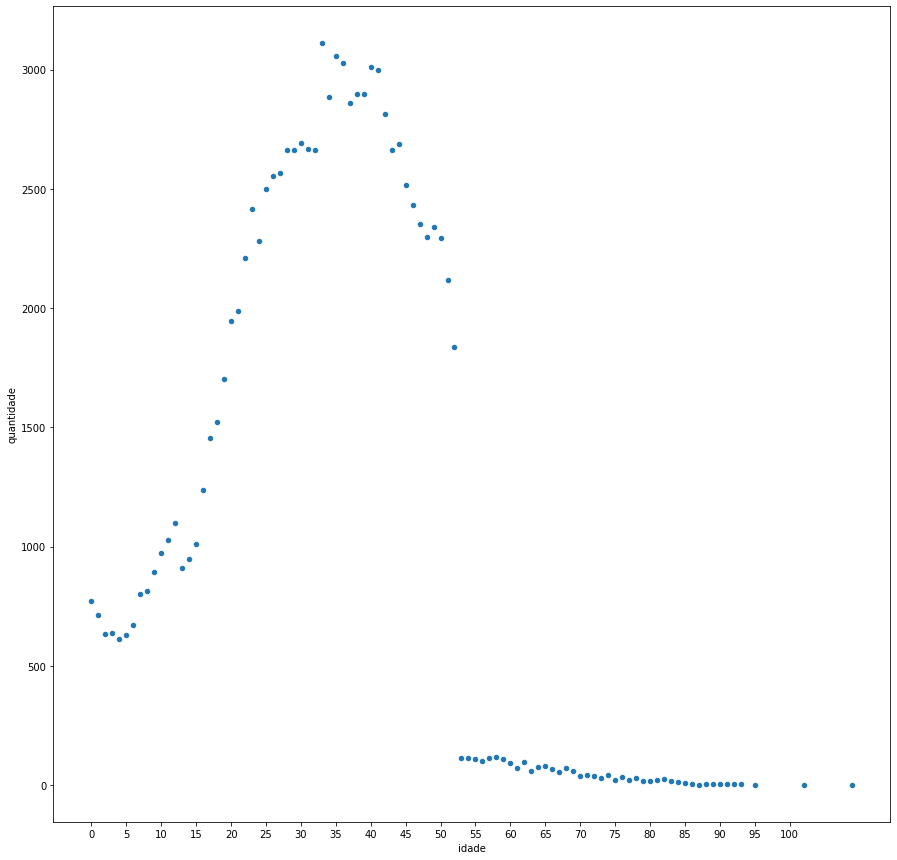

In [57]:
dispersao_idade_confirmados = {}

for idade in confirmados.idade:
  if str(idade) != 'nan':  
    qtd = dispersao_idade_confirmados[idade] if idade in dispersao_idade_confirmados else 0
    dispersao_idade_confirmados[idade] = qtd + 1

frame = pd.DataFrame([{'idade': x, 'quantidade': y} for x,y in dispersao_idade_confirmados.items()])

frame.plot.scatter(x="idade", y="quantidade", s=20, figsize=(15, 15))
plt.xticks(np.arange(0, 105, 5.0))